## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata , study_results , on="Mouse ID" , how="outer")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].value_counts())
number_of_mice

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pd.DataFrame(combined_data["Mouse ID"].value_counts())
duplicate_mice = duplicate_mice.loc[duplicate_mice["Mouse ID"] > 1]
duplicate_mice = duplicate_mice.reset_index()
duplicate_mice = duplicate_mice.rename(columns = {"index" : "Mouse ID","Mouse ID":"Duplicate Count"})
duplicate_mice
duplicate_mice_df = pd.merge(duplicate_mice,combined_data, on="Mouse ID", how="left")
duplicate_mice_time_df = duplicate_mice_df[["Mouse ID","Timepoint"]]
duplicate_mice_time_df

,Mouse ID,Timepoint
0,g989,0
1,g989,0
2,g989,5
3,g989,5
4,g989,10
...,...,...
1876,f278,5
1877,y601,0
1878,y601,5
1879,z234,0


In [16]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df.head()

,Mouse ID,Duplicate Count,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,13,Propriva,Female,21,26,0,45.000000,0
1,g989,13,Propriva,Female,21,26,0,45.000000,0
2,g989,13,Propriva,Female,21,26,5,48.786801,0
3,g989,13,Propriva,Female,21,26,5,47.570392,0
4,g989,13,Propriva,Female,21,26,10,51.745156,0


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_df = combined_data.drop_duplicates(subset='Mouse ID', keep="last")
unique_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [18]:
# Checking the number of mice in the clean DataFrame.
number_of_unique_mice = len(unique_mice_df)
number_of_unique_mice

249

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_vol = unique_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_vol = unique_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_vol = unique_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_vol = unique_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_vol = unique_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df1 = pd.merge(mean_vol,median_vol, on = "Drug Regimen", suffixes = ("_mean","_median"))
summary_df2 = pd.merge(summary_df1,var_vol, on = "Drug Regimen")
summary_df3 = pd.merge(summary_df2,std_vol, on = "Drug Regimen", suffixes = ("_VAR","_STD"))
summary_df4 = pd.merge(summary_df3,sem_vol, on = "Drug Regimen")
summary_final = summary_df4.rename(columns ={"Tumor Volume (mm3)" : "Tumor Volume (mm3)_SEM"})
summary_final


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_VAR,Tumor Volume (mm3)_STD,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice on each Regimen')

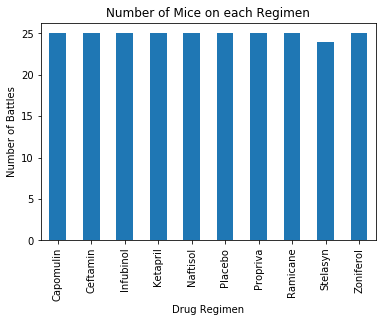

In [155]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_tested_bar = unique_mice_df.groupby("Drug Regimen")["Mouse ID"].count()
mice_test_plot = mice_tested_bar.plot.bar(y =" Number of Mice" ,title ="Number of Mice on each Regimen")
mice_test_plot.set_ylabel("Number of Battles");
mice_test_plot.set_title("Number of Mice on each Regimen")

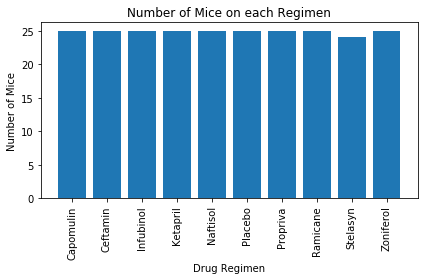

In [44]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen_list = mice_tested_bar.reset_index()
plt.bar(drug_regimen_list["Drug Regimen"],drug_regimen_list["Mouse ID"])
plt.title("Number of Mice on each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

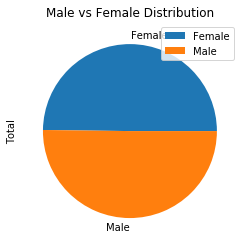

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_count = len(unique_mice_df.loc[unique_mice_df["Sex"] == "Female"])
male_count = len(unique_mice_df.loc[unique_mice_df["Sex"] == "Male"])
sex_distribution = pd.DataFrame({
    "Sex":["Female","Male"],
    "Total":[female_count,male_count]})
sex_distribution = sex_distribution.set_index("Sex")
sex_plot = sex_distribution.plot.pie(y = "Total")
sex_plot.set_title("Male vs Female Distribution")
sex_plot

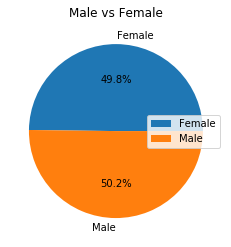

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution["Total"], labels = sex_distribution.index, autopct = "%1.1f%%")
plt.title("Male vs Female")
plt.legend(loc="right")
plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sex_distribution 

,Sex,Total
0,Female,124
1,Male,125


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
